In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mat_data = r'D:\BTP\sub-1_ses-1_task-bcimici_meg.mat'

In [5]:
pip install scipy



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import scipy.io

# Load the .mat file
data = scipy.io.loadmat('sub-1_ses-1_task-bcimici_meg (1).mat')

# View the keys (like variable names in MATLAB)
print(data.keys())


FileNotFoundError: [Errno 2] No such file or directory: 'sub-1_ses-1_task-bcimici_meg (1).mat'

In [13]:
import scipy.io

# Full path to your file
file_path = r"C:\Users\Samyak\Downloads\sub-1_ses-1_task-bcimici_meg.mat"

# Load the MATLAB .mat file
mat_data = scipy.io.loadmat(file_path)

# Show top-level keys in the file
print(mat_data.keys())


NotImplementedError: Please use HDF reader for matlab v7.3 files, e.g. h5py

In [15]:
import h5py

file_path = r"C:\Users\Samyak\Downloads\sub-1_ses-1_task-bcimici_meg.mat"

# Open the .mat file (v7.3 format is HDF5)
with h5py.File(file_path, 'r') as f:
    print("Top-level keys:")
    for key in f.keys():
        print(key)

    # For example, to read 'dataMAT'
    data = f['dataMAT']
    print("\nShape of dataMAT:", data.shape)


Top-level keys:
#refs#
dataMAT


AttributeError: 'Group' object has no attribute 'shape'

In [17]:
# Recursively walk through structure
def print_hdf5_structure(name, obj):
    print(name)

with h5py.File(file_path, 'r') as f:
    f.visititems(print_hdf5_structure)


#refs#
#refs#/0
#refs#/0b
#refs#/0c
#refs#/0d
#refs#/0e
#refs#/0f
#refs#/0g
#refs#/0h
#refs#/0i
#refs#/0j
#refs#/0k
#refs#/0l
#refs#/0m
#refs#/0n
#refs#/0o
#refs#/0p
#refs#/0q
#refs#/0r
#refs#/0s
#refs#/0t
#refs#/0u
#refs#/0v
#refs#/0w
#refs#/0x
#refs#/0y
#refs#/0z
#refs#/1
#refs#/1b
#refs#/1c
#refs#/1d
#refs#/1e
#refs#/1f
#refs#/1g
#refs#/1h
#refs#/1i
#refs#/1j
#refs#/1k
#refs#/1l
#refs#/1m
#refs#/1n
#refs#/1o
#refs#/1p
#refs#/1q
#refs#/1r
#refs#/1s
#refs#/1t
#refs#/1u
#refs#/1v
#refs#/1w
#refs#/1x
#refs#/1y
#refs#/1z
#refs#/2
#refs#/2b
#refs#/2c
#refs#/2d
#refs#/2e
#refs#/2f
#refs#/2g
#refs#/2h
#refs#/2i
#refs#/2j
#refs#/2k
#refs#/2l
#refs#/2m
#refs#/2n
#refs#/2o
#refs#/2p
#refs#/2q
#refs#/2r
#refs#/2s
#refs#/2t
#refs#/2u
#refs#/2v
#refs#/2w
#refs#/2x
#refs#/2y
#refs#/2z
#refs#/3
#refs#/3b
#refs#/3c
#refs#/3d
#refs#/3e
#refs#/3f
#refs#/3g
#refs#/3h
#refs#/3i
#refs#/3j
#refs#/3k
#refs#/3l
#refs#/3m
#refs#/3n
#refs#/3o
#refs#/3p
#refs#/3q
#refs#/3r
#refs#/3s
#refs#/3t
#refs#/3u
#refs#/

In [19]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Path to your file
file_path = r"C:\Users\Samyak\Downloads\sub-1_ses-1_task-bcimici_meg.mat"

# Open the file and explore
with h5py.File(file_path, 'r') as f:
    # Explore structure
    print("Top-level keys:", list(f.keys()))
    
    # Navigate to dataMAT -> trial
    data = f['dataMAT']
    
    # trial is a reference inside the struct
    trial_ref = data['trial'][0][0]
    
    # Follow the reference to the actual data
    trial_data = f[trial_ref]
    print("Shape of trial data:", trial_data.shape)

    # Get the first trial (trial_data is a cell array of shape (1, N))
    first_trial_ref = trial_data[0][0]
    first_trial = f[first_trial_ref][()]  # [()] loads the data as numpy array
    
    # Optional: Normalize the signal
    signal = first_trial[0]  # Taking one channel
    signal = (signal - np.mean(signal)) / np.std(signal)

    # Plot the signal
    plt.figure(figsize=(12, 4))
    plt.plot(signal)
    plt.title("Normalized MEG Signal - First Trial, First Channel")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()


Top-level keys: ['#refs#', 'dataMAT']
Shape of trial data: (7000, 306)


TypeError: Accessing a group is done with bytes or str, not <class 'numpy.float64'>

In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:\Users\Samyak\Downloads\sub-1_ses-1_task-bcimici_meg.mat"

with h5py.File(file_path, 'r') as f:
    print("Top-level keys:", list(f.keys()))

    # Access the 'dataMAT' struct
    data = f['dataMAT']

    # Get the reference to the 'trial' cell array
    trial_refs = data['trial'][0][0]  # This is a reference array

    # Get the actual list of trials (this is a 1xN cell array of references)
    trial_cell = f[trial_refs]

    # Get the reference to the first trial
    first_trial_ref = trial_cell[0][0]

    # Access the first trial data
    first_trial_data = f[first_trial_ref][()]  # actual data as np array

    print("Shape of first trial:", first_trial_data.shape)  # [channels, time]

    # Take the first channel
    signal = first_trial_data[0, :]

    # Normalize
    signal = (signal - np.mean(signal)) / np.std(signal)

    # Plot it
    plt.figure(figsize=(12, 4))
    plt.plot(signal)
    plt.title("Normalized Signal - Trial 1, Channel 1")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()


Top-level keys: ['#refs#', 'dataMAT']


TypeError: Accessing a group is done with bytes or str, not <class 'numpy.float64'>

In [23]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:\Users\Samyak\Downloads\sub-1_ses-1_task-bcimici_meg.mat"

with h5py.File(file_path, 'r') as f:
    print("Top-level keys:", list(f.keys()))  # ['#refs#', 'dataMAT']

    # Access the 'dataMAT' group
    data = f['dataMAT']
    
    # Access the 'trial' field (reference to cell array)
    trial_refs = data['trial'][0][0]  # this is a reference

    # Access the trial cell array using the reference
    trial_cell_array = f[trial_refs]

    # Get the reference to the first trial
    first_trial_objref = trial_cell_array[0, 0]  # this is a real object reference

    # Use that reference to get the actual trial data
    first_trial_data = f[first_trial_objref][()]  # actual data

    print("First trial shape:", first_trial_data.shape)  # [channels, time]

    # Take the first channel
    signal = first_trial_data[0, :]  # first row

    # Normalize the signal
    signal = (signal - np.mean(signal)) / np.std(signal)

    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(signal)
    plt.title("Normalized Signal - Trial 1, Channel 1")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()


Top-level keys: ['#refs#', 'dataMAT']


TypeError: Accessing a group is done with bytes or str, not <class 'numpy.float64'>

In [25]:
!pip install h5py numpy matplotlib scipy


In [31]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Path to your .mat file
file_path = "C:\Users\Samyak\Downloads\sub-1_ses-1_task-bcimici_meg.mat" 

# Open the file using h5py
f = h5py.File(file_path, 'r')

# Display top-level keys
print("Top-level keys in .mat file:", list(f.keys()))

# Access nested structure - usually inside a top group
data_group = f['dataMAT']

# Explore fields inside this group
print("Fields in 'dataMAT':", list(data_group.keys()))

# Get trial data
trial_refs = data_group['trial']
print("Shape of trial references:", trial_refs.shape)

# Extract first trial's data
first_trial_ref = trial_refs[0][0]
trial_data = f[first_trial_ref][()]
print("Shape of first trial data:", trial_data.shape)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (335670322.py, line 6)

In [33]:
data = f['dataMAT']

# Get trial cell array (shape: 1 x 200 trials)
trial_refs = data['trial']
print("Shape of trial cell array:", trial_refs.shape)

# Extract 1st trial reference
first_trial_ref = trial_refs[0][0]
trial_data = f[first_trial_ref][()]
print("Trial shape [channels x time]:", trial_data.shape)


KeyError: 'Unable to synchronously open object (invalid identifier type to function)'

In [35]:
# Let's take the 1st channel from 1st trial
signal = trial_data[0, :]

# Normalize signal
signal = (signal - np.mean(signal)) / np.std(signal)

# Plot it
plt.plot(signal)
plt.title("1st Channel of 1st Trial")
plt.show()


OSError: Can't synchronously read data (dset_id is not a dataset ID)

Shape of first trial: (7000, 306)


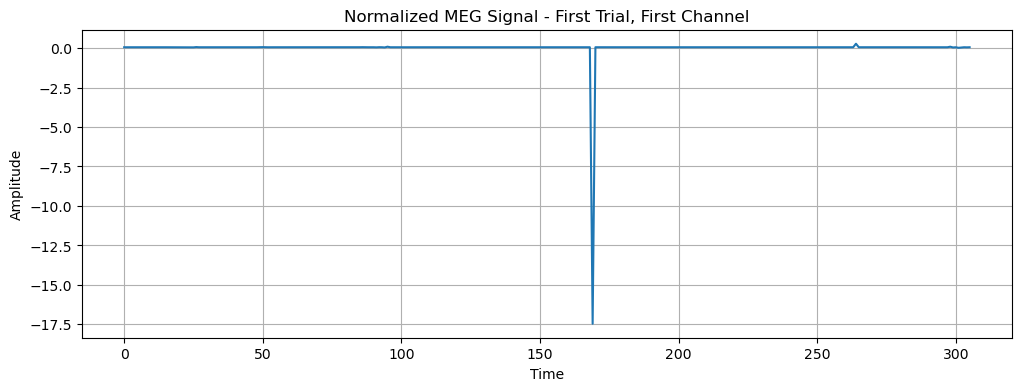

In [65]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Path to your .mat file
file_path = r"C:\Users\Samyak\Downloads\sub-1_ses-1_task-bcimici_meg.mat"

with h5py.File(file_path, 'r') as f:
    # Step 1: Navigate into the 'dataMAT' struct
    data = f['dataMAT']

    # Step 2: Access the 'trial' field which is a 1x200 cell
    trial_refs = data['trial'][0]  # this gives array of references (200,)
    
    # Step 3: Choose first trial
    first_trial_ref = trial_refs[0]
    first_trial = f[first_trial_ref][:]  # Shape: (channels, timepoints)

    print("Shape of first trial:", first_trial.shape)

    # Step 4: Choose the first channel
    signal = first_trial[0, :]  # 1st channel

    # Step 5: Normalize the signal
    signal = (signal - np.mean(signal)) / np.std(signal)

    # Step 6: Plot the signal
    plt.figure(figsize=(12, 4))
    plt.plot(signal)
    plt.title("Normalized MEG Signal - First Trial, First Channel")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()


In [67]:
import numpy as np
from scipy.fftpack import fft, ifft, fftshift, ifftshift

def MVMD(signal, alpha, tau, K, DC, init, tol):
    x, y = signal.shape
    if x > y:
        C = y
        signal = signal.T
    else:
        C = x

    T = signal.shape[1]
    t = np.arange(1, T + 1) / T
    freqs = t - 0.5 - 1 / T

    # FFT of the signal
    f_hat = fftshift(fft(signal, axis=1))
    f_hat_plus = f_hat.copy()
    f_hat_plus[:, :T//2] = 0  # Set the negative frequencies to zero

    # Initialization
    N = 500
    Alpha = alpha * np.ones(K)
    u_hat_plus = np.zeros((N, len(freqs), K, C), dtype=complex)
    omega_plus = np.zeros((N, K))

    if init == 1:
        omega_plus[0, :] = (0.5 / K) * np.arange(K)
    elif init == 2:
        omega_plus[0, :] = np.sort(np.exp(np.log(1 / T) + (np.log(0.5) - np.log(1 / T)) * np.random.rand(K)))
    else:
        omega_plus[0, :] = 0

    if DC:
        omega_plus[0, 0] = 0

    lambda_hat = np.zeros((N, len(freqs), C), dtype=complex)
    uDiff = tol + np.finfo(float).eps
    n = 0
    sum_uk = np.zeros((C, len(freqs)), dtype=complex)

    # Main algorithm
    while uDiff > tol and n < N:
        k = 0
        for c in range(C):
            sum_uk[c, :] = u_hat_plus[n, :, K-1, c] + sum_uk[c, :] - u_hat_plus[n, :, k, c]
            u_hat_plus[n+1, :, k, c] = (f_hat_plus[c, :] - sum_uk[c, :] - lambda_hat[n, :, c] / 2) / (1 + Alpha[k] * (freqs - omega_plus[n, k])**2)

        if not DC:
            temp1 = 0
            temp2 = 0
            for c in range(C):
                numerator = np.sum(freqs * np.abs(u_hat_plus[n+1, :, k, c])**2)
                denominator = np.sum(np.abs(u_hat_plus[n+1, :, k, c])**2)
                temp1 += numerator
                temp2 += denominator
            omega_plus[n+1, k] = temp1 / temp2

        for k in range(1, K):
            for c in range(C):
                sum_uk[c, :] = u_hat_plus[n+1, :, k-1, c] + sum_uk[c, :] - u_hat_plus[n, :, k, c]
                u_hat_plus[n+1, :, k, c] = (f_hat_plus[c, :] - sum_uk[c, :] - lambda_hat[n, :, c] / 2) / \
                                          (1 + Alpha[k] * (freqs - omega_plus[n, k])**2)

            temp1 = 0
            temp2 = 0
            for c in range(C):
                numerator = np.sum(freqs * np.abs(u_hat_plus[n+1, :, k, c])**2)
                denominator = np.sum(np.abs(u_hat_plus[n+1, :, k, c])**2)
                temp1 += numerator
                temp2 += denominator
            omega_plus[n+1, k] = temp1 / temp2

        for c in range(C):
            lambda_hat[n+1, :, c] = lambda_hat[n, :, c] + tau * (np.sum(u_hat_plus[n+1, :, :, c], axis=1) - f_hat_plus[c, :])

        n += 1

        uDiff = np.finfo(float).eps
        for i in range(K):
            for c in range(C):
                uDiff += np.sum((u_hat_plus[n, :, i, c] - u_hat_plus[n-1, :, i, c]) * \
                                np.conj(u_hat_plus[n, :, i, c] - u_hat_plus[n-1, :, i, c]))
        uDiff = np.abs(uDiff)

    N = min(N, n)
    omega = omega_plus[:N, :]

    u_hat = np.zeros((T, K, C), dtype=complex)
    for c in range(C):
        u_hat[:, :, c] = u_hat_plus[N, :, :, c]

    u = np.zeros((K, T, C))
    for k in range(K):
        for c in range(C):
            u[k, :, c] = np.real(ifft(ifftshift(u_hat[:, k, c])))

    u_hat = np.zeros((len(freqs), K, C), dtype=complex)
    for k in range(K):
        for c in range(C):
            u_hat[:, k, c] = fftshift(fft(u[k, :, c]))

    u_hat = np.transpose(u_hat, (1, 0, 2))

    return u, u_hat, omega


In [73]:
u, u_hat, omega = MVMD( first_trial, alpha=2000, tau=0, K=4, DC=0, init=1, tol=1e-7)

MemoryError: Unable to allocate 63.8 GiB for an array with shape (500, 7000, 4, 306) and data type complex128

In [71]:
signal.shape

(306,)